In [6]:
from smach_utils2 import *
import matplotlib.pyplot as plt
#arm = moveit_commander.MoveGroupCommander('arm')


[ WARN] [1709414650.363723349]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1065.358000 according to authority /pose_integrator
[ WARN] [1709414650.363795922]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1065.358000 according to authority /pose_integrator
[ WARN] [1709414651.221108715]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1065.972000 according to authority /pose_integrator
[ WARN] [1709414651.221149418]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1065.972000 according to authority /pose_integrator
[ WARN] [1709414651.221185746]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1065.972000 according to authority /pose_integrator
[ WARN] [1709414651.221217895]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1065.972000 according to authority /pose_integrator
[ WARN] [1709414651.22

[ WARN] [1709414652.919186614]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1066.757000 according to authority /pose_integrator
[ WARN] [1709414652.919236437]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1066.757000 according to authority /pose_integrator
[ WARN] [1709414652.919270247]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1066.757000 according to authority /pose_integrator
[ WARN] [1709414652.919302309]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1066.757000 according to authority /pose_integrator
[ WARN] [1709414652.919334215]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1066.757000 according to authority /pose_integrator
[ WARN] [1709414652.919381602]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1066.757000 according to authority /pose_integrator
[ WARN] [1709414652.91

In [23]:
arm = moveit_commander.MoveGroupCommander('arm')

In [ ]:
head.set_joint_values([0.0,-0.65])
arm.set_named_target('go')
arm.go()

True

In [ ]:

rospy.sleep(0.6)
rospy.sleep(0.6)
image= cv2.cvtColor(rgbd.get_image(), cv2.COLOR_RGB2BGR)
img_msg  = bridge.cv2_to_imgmsg(image)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
debug_image=   cv2.cvtColor(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]), cv2.COLOR_RGB2BGR)

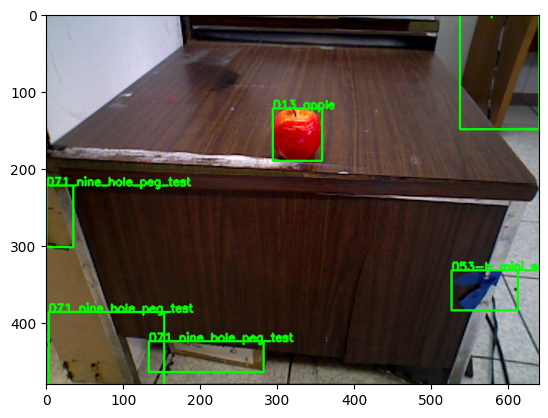

In [ ]:

plt.imshow(debug_image)

In [ ]:

for i in range(len(res.poses)):
    tf_man.getTF("head_rgbd_sensor_rgb_frame")
    tf_man.pub_static_tf(pos=[res.poses[i].position.x ,res.poses[i].position.y,res.poses[i].position.z], rot=[0,0,0,1],ref="head_rgbd_sensor_rgb_frame",point_name=res.names[i].data[4:] )   
    rospy.sleep(0.3)
    tf_man.change_ref_frame_tf(res.names[i].data[4:])



In [ ]:
omni_base.move_d_to(target_distance=0.78,target_link='apple')

header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
goal_id: 
  stamp: 
    secs: 0
    nsecs:         0
  id: ''
goal: 
  x: -0.467015051702509
  y: -0.22669822891342312
  yaw: 0.47700126206802895
  timeout: 60
  known_location: "None"


[ERROR] [1707507992.966521]: Got a result when we were already in the DONE state


True

In [ ]:
target_object='apple'
trans,_=tf_man.getTF(target_object,ref_frame="base_link")
trans


[0.629558790262621, 0.012916567572760052, 0.7296863507872446]

In [ ]:
target_object='apple'
_,rot= tf_man.getTF("base_link",ref_frame='map')

original_rot=tf.transformations.euler_from_quaternion(rot)[2]
trans,_=tf_man.getTF(target_object,ref_frame="base_link")


trans , original_rot

([0.6301897821617946, 0.0121525685811541, 0.7296863507872448],
 2.1633042023868883)

In [ ]:
_,rot= tf_man.getTF("base_link",ref_frame='map')
original_rot=tf.transformations.euler_from_quaternion(rot)[2]
target_object='apple'


succ = False
            
while not succ:
    
    _,rot= tf_man.getTF("base_link",ref_frame='map')
    trans,_=tf_man.getTF(target_object,ref_frame="base_link")

    trans
    eX, eY, eZ = trans
    
    eX+= -0.4
    eY+= -.06
    
    eT= tf.transformations.euler_from_quaternion(rot)[2] - original_rot #Original 
    print (eT)
    if eT > np.pi: eT=-2*np.pi+eT
    if eT < -np.pi: eT= 2*np.pi+eT
    rospy.loginfo("error: {:.2f}, {:.2f}, angle {:.2f}, target obj frame {}".format(eX, eY , eT,target_object))
    X, Y, Z = trans
    rospy.loginfo("Pose: {:.2f}, {:.2f}, angle {:.2f}, target obj frame {}".format(X, Y , eT,target_object))
    
    if abs(eX) <=0.05 :
        print ('here')
        eX = 0
    if abs(eY) <=0.05  :
        eY = 0
    if abs(eT   ) < 0.1:
        eT = 0
    succ =  eX == 0 and eY == 0 and eT==0

    
    omni_base.tiny_move( velX=0.2*+eX,velY=0.3*eY, velT=-eT,std_time=0.2, MAX_VEL=0.3) 


0.0
[INFO] [1707936350.045001]: error: 0.23, -0.05, angle 0.00, target obj frame apple
[INFO] [1707936350.051634]: Pose: 0.63, 0.01, angle 0.00, target obj frame apple
0.0016897846506216396
[INFO] [1707936350.256635]: error: 0.22, -0.05, angle 0.00, target obj frame apple
[INFO] [1707936350.261170]: Pose: 0.62, 0.01, angle 0.00, target obj frame apple
0.007509744236402938
[INFO] [1707936350.466656]: error: 0.22, -0.05, angle 0.01, target obj frame apple
[INFO] [1707936350.471418]: Pose: 0.62, 0.01, angle 0.01, target obj frame apple
0.0008777598323037594
[INFO] [1707936350.675931]: error: 0.21, -0.04, angle 0.00, target obj frame apple
[INFO] [1707936350.680668]: Pose: 0.61, 0.02, angle 0.00, target obj frame apple
0.003628178739286003
[INFO] [1707936350.884321]: error: 0.20, -0.05, angle 0.00, target obj frame apple
[INFO] [1707936350.888786]: Pose: 0.60, 0.01, angle 0.00, target obj frame apple
0.0020105048824623495
[INFO] [1707936351.094164]: error: 0.19, -0.05, angle 0.00, target o

In [ ]:
res.names

[data: "013_apple",
 data: "071_nine_hole_peg_test",
 data: "029_plate",
 data: "071_nine_hole_peg_test",
 data: "053-b_mini_soccer_ball_v2",
 data: "071_nine_hole_peg_test"]

In [ ]:
hand_cam= HAND_RGB()


In [ ]:
#clear_octo_client()

pickup_pose=[0.65,-1.2,0.0,-1.9, 0.0, 0.0]
succ= arm.go(pickup_pose)
gripper.open()


[(306, 358), (237, 289)]


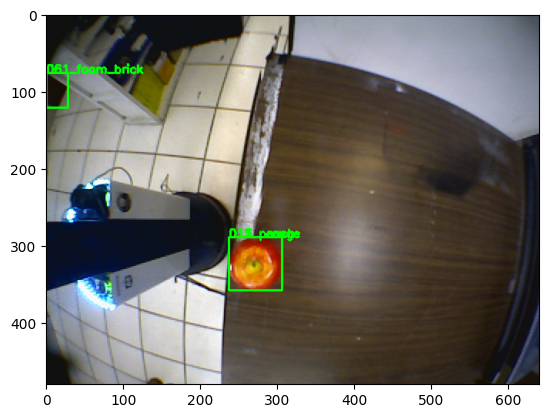

In [ ]:

image= cv2.cvtColor(hand_cam.get_image(), cv2.COLOR_RGB2BGR)
img_msg  = bridge.cv2_to_imgmsg(image)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
debug_image=   cv2.cvtColor(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]), cv2.COLOR_RGB2BGR)
for i in range(len(res.names)):
    if res.names[i].data== '013_apple' or res.names[i].data== '017_orange':
        bbM=res.pt_min.data[2*i:2*i+2]
        bbm=res.pt_max.data[2*i:2*i+2]
        bbx=[bbM,bbm]
print(bbx)
plt.imshow(debug_image)

# [(297, 191), (231, 226)]  at pkcp pose #Real Tak
### [(323, 266), (280, 215)]  at pkcp pose #Gazebo


In [ ]:
eX,eY= 0.3,0.3 

while abs(eX) > 0.05 or abs(eY) > 0.05:
    image= cv2.cvtColor(hand_cam.get_image(), cv2.COLOR_RGB2BGR)
    img_msg  = bridge.cv2_to_imgmsg(image)
    req      = classify_client.request_class()
    req.in_.image_msgs.append(img_msg)
    res      = classify_client(req)


    for i in range(len(res.names)):
        if res.names[i].data== '013_apple' or res.names[i].data== '017_orange':
            bbM=res.pt_min.data[2*i:2*i+2]
            bbm=res.pt_max.data[2*i:2*i+2]
            bbx=[bbM,bbm]
    print(bbx)
    eY=(bbx[1][1]-215)/215    #experience value
    #print(f'error relative to gripper cam {eY}')


    #eX=(bbx[0][0]-323)/323
    eY=(bbx[1][1]-239)/239
    eX=(bbx[0][0]-312)/312
    #eY=(bbx[1][1]-215)/215    #experience value

    print(f'error relative to gripper cam ex={eX} ey={eY}')
    omni_base.tiny_move(velX=0.5*eX, velY=0.5*-eY, MAX_VEL=0.05) 
print(f'error relative to gripper cam ex={eX} ey={eY}:::::: Error within tolerance')

[(306, 357), (237, 289)]
error relative to gripper cam ex=-0.019230769230769232 ey=0.20920502092050208
[(309, 346), (240, 277)]
error relative to gripper cam ex=-0.009615384615384616 ey=0.1589958158995816
[(317, 310), (249, 244)]
error relative to gripper cam ex=0.016025641025641024 ey=0.02092050209205021
error relative to gripper cam ex=0.016025641025641024 ey=0.02092050209205021:::::: Error within tolerance


In [ ]:
bbx

[(317, 310), (249, 244)]

In [ ]:
eY=(bbx[1][1]-239)/239
eX=(bbx[0][0]-312)/312
print(f'error relative to gripper cam ex={eX} ey={eY}')


error relative to gripper cam ex=0.016025641025641024 ey=0.02092050209205021


In [ ]:
#omni_base.tiny_move(velX=0.5*eX, velY=0.5*-eY, MAX_VEL=0.05) 


In [ ]:
clear_octo_client()

av=arm.get_current_joint_values()
print (av,'av')
av[0]+= -0.17###LAB
#av[0]+= -0.35###GAZ
succ=arm.go(av)
rospy.sleep(0.5)
gripper.close(force=0.06)

[0.6499186446007862, -1.2002595280188855, -9.345343694011632e-06, -1.8999086302849657, 8.010822381621097e-05, 0.0] av


In [ ]:
av=arm.get_current_joint_values()
print (av,'av')
av[0]+= 0.15
succ=arm.go(av)
omni_base.tiny_move(velX=-0.3, std_time=4.0)
arm.set_named_target('go')
arm.go()
#tf_man.pub_static_tf(point_name='apple')

[0.4798374153591347, -1.2002595280188855, 4.165465630601162e-05, -1.8999836302849658, 8.010822381621097e-05, 0.0] av


True

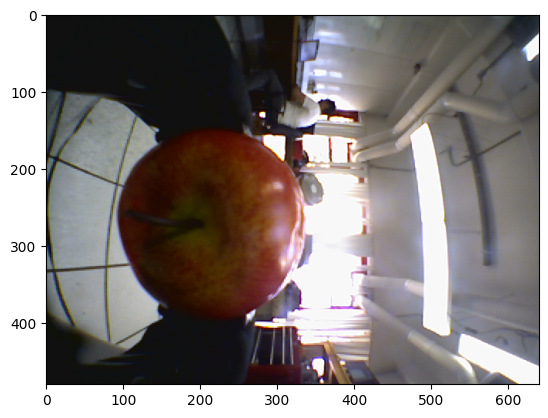

In [ ]:
plt.imshow(hand_cam.get_image())

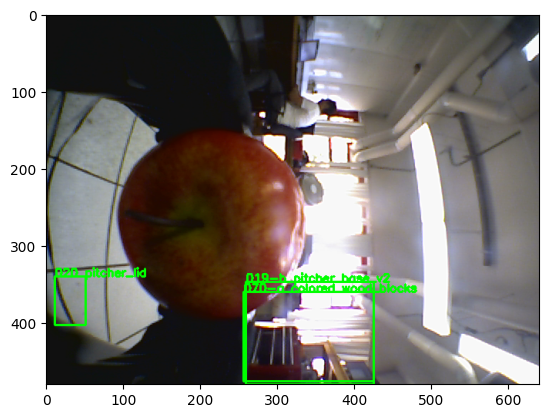

In [ ]:
image= cv2.cvtColor(hand_cam.get_image(), cv2.COLOR_RGB2BGR)
img_msg  = bridge.cv2_to_imgmsg(image)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
debug_image=   cv2.cvtColor(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]), cv2.COLOR_RGB2BGR)
plt.imshow(debug_image)

In [ ]:
gripper.open()

In [ ]:
gripper.close(force=0.06)

In [163]:
img_msg  = bridge.cv2_to_imgmsg(rgbd.get_image())
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
objects=detect_object_yolo('all',res)   

[ WARN] [1709421230.847076062]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.066000 according to authority /pose_integrator
[ WARN] [1709421230.847130688]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.066000 according to authority /pose_integrator
[ WARN] [1709421230.847159962]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.066000 according to authority /pose_integrator
[ WARN] [1709421230.847190972]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.066000 according to authority /pose_integrator
[ WARN] [1709421230.847221080]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.066000 according to authority /pose_integrator
[ WARN] [1709421230.847249757]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.066000 according to authority /pose_integrator
[ WARN] [1709421230.84

[ WARN] [1709421231.260064522]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.206000 according to authority /pose_integrator
[ WARN] [1709421231.260120753]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.206000 according to authority /pose_integrator
[ WARN] [1709421231.260164311]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.206000 according to authority /pose_integrator
[ WARN] [1709421231.260205520]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.206000 according to authority /pose_integrator
[ WARN] [1709421231.260238782]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.206000 according to authority /pose_integrator
[ WARN] [1709421231.260279451]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.206000 according to authority /pose_integrator
[ WARN] [1709421231.26

In [164]:

for i in range(len(res.poses)):
    tf_man.getTF("head_rgbd_sensor_rgb_frame")
    position = [res.poses[i].position.x ,res.poses[i].position.y,res.poses[i].position.z]
    tf_man.pub_static_tf(pos= position, rot=[0,0,0,1], ref="head_rgbd_sensor_rgb_frame", point_name=res.names[i].data[4:] )   
    rospy.sleep(0.3)
    tf_man.change_ref_frame_tf(res.names[i].data[4:])




[ WARN] [1709421232.515268145]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.634000 according to authority /pose_integrator
[ WARN] [1709421232.515331070]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.634000 according to authority /pose_integrator
[ WARN] [1709421232.515383170]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.634000 according to authority /pose_integrator
[ WARN] [1709421232.515427167]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.634000 according to authority /pose_integrator
[ WARN] [1709421232.515470320]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.634000 according to authority /pose_integrator
[ WARN] [1709421232.515512686]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.634000 according to authority /pose_integrator
[ WARN] [1709421232.51

[ WARN] [1709421233.414759846]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.979000 according to authority /pose_integrator
[ WARN] [1709421233.414812339]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.979000 according to authority /pose_integrator
[ WARN] [1709421233.414844188]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.979000 according to authority /pose_integrator
[ WARN] [1709421233.414873627]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.979000 according to authority /pose_integrator
[ WARN] [1709421233.414908616]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.979000 according to authority /pose_integrator
[ WARN] [1709421233.414938314]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2728.979000 according to authority /pose_integrator
[ WARN] [1709421233.41

In [165]:
def detect_object_yolo(object_name,res):
    # find object_name in the response message from object_classification service (Yolo)
    objs=[]
    for i,name in enumerate(res.names):
        objs.append(name.data[4:])
        if name.data[4:]==object_name:return res.poses[i]
    if object_name=='all':
        
        return objs
    return []

[ WARN] [1709421234.493236676]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.295000 according to authority /pose_integrator
[ WARN] [1709421234.493289185]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.295000 according to authority /pose_integrator
[ WARN] [1709421234.493327554]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.295000 according to authority /pose_integrator
[ WARN] [1709421234.493357050]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.295000 according to authority /pose_integrator
[ WARN] [1709421234.493385418]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.295000 according to authority /pose_integrator
[ WARN] [1709421234.493415693]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.295000 according to authority /pose_integrator
[ WARN] [1709421234.49

[ WARN] [1709421234.986737566]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.441000 according to authority /pose_integrator
[ WARN] [1709421234.986804624]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.441000 according to authority /pose_integrator
[ WARN] [1709421234.986853558]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.441000 according to authority /pose_integrator
[ WARN] [1709421234.986899380]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.441000 according to authority /pose_integrator
[ WARN] [1709421234.986943798]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.441000 according to authority /pose_integrator
[ WARN] [1709421234.986978227]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2729.441000 according to authority /pose_integrator
[ WARN] [1709421234.98

In [ ]:
objects=detect_object_yolo('all',res)

[ WARN] [1709421236.553690397]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.059000 according to authority /pose_integrator
[ WARN] [1709421236.553758014]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.059000 according to authority /pose_integrator
[ WARN] [1709421236.553803932]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.059000 according to authority /pose_integrator
[ WARN] [1709421236.553840064]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.059000 according to authority /pose_integrator
[ WARN] [1709421236.553875557]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.059000 according to authority /pose_integrator
[ WARN] [1709421236.553911563]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.059000 according to authority /pose_integrator
[ WARN] [1709421236.55

[ WARN] [1709421238.503083759]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.862000 according to authority /pose_integrator
[ WARN] [1709421238.503133349]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.862000 according to authority /pose_integrator
[ WARN] [1709421238.503156869]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.862000 according to authority /pose_integrator
[ WARN] [1709421238.503178785]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.862000 according to authority /pose_integrator
[ WARN] [1709421238.503199895]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.862000 according to authority /pose_integrator
[ WARN] [1709421238.503221492]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2730.862000 according to authority /pose_integrator
[ WARN] [1709421238.50

# PLANE 1
#### 7.883384	5.948245	0.701945,
#### 8.214565	5.962619	0.700034,
#### 8.213697	6.107727	0.709487,
####  7.893623	6.082935	0.693285

# PLANE 2
#### 7.88076	6.086619	0.416096,
#### 8.214128	5.9663	0.416672

# Plane 3
#### 8.20238	5.963262	0.117541

In [167]:
objs={}
xyz=[]
for object in objects:
    pose,_=tf_man.getTF(object)    
    xyz.append(pose)
xyz=np.asarray(xyz)

df= pd.DataFrame(xyz)
df.columns=['x','y','z']     
df['obj_name']=objects

df

,x,y,z,obj_name
0,8.20238,5.963262,0.117541,racquetball


[ WARN] [1709421240.365670674]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2731.535000 according to authority /pose_integrator
[ WARN] [1709421240.365731290]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2731.535000 according to authority /pose_integrator
[ WARN] [1709421240.365772140]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2731.535000 according to authority /pose_integrator
[ WARN] [1709421240.365807181]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2731.535000 according to authority /pose_integrator
[ WARN] [1709421240.365840134]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2731.535000 according to authority /pose_integrator
[ WARN] [1709421240.365869509]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2731.535000 according to authority /pose_integrator
[ WARN] [1709421240.36

[ WARN] [1709421242.047280929]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.059000 according to authority /pose_integrator
[ WARN] [1709421242.047347099]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.059000 according to authority /pose_integrator
[ WARN] [1709421242.047395085]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.059000 according to authority /pose_integrator
[ WARN] [1709421242.047440332]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.059000 according to authority /pose_integrator
[ WARN] [1709421242.047489762]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.059000 according to authority /pose_integrator
[ WARN] [1709421242.047526594]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.059000 according to authority /pose_integrator
[ WARN] [1709421242.04

[ WARN] [1709421242.329383689]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.139000 according to authority /pose_integrator
[ WARN] [1709421242.329464436]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.139000 according to authority /pose_integrator
[ WARN] [1709421242.329520294]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.139000 according to authority /pose_integrator
[ WARN] [1709421242.329559110]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.139000 according to authority /pose_integrator
[ WARN] [1709421242.329608211]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.139000 according to authority /pose_integrator
[ WARN] [1709421242.329674295]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.139000 according to authority /pose_integrator
[ WARN] [1709421242.32

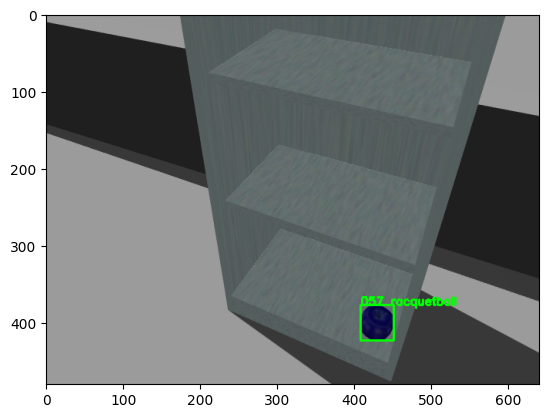

[ WARN] [1709421244.101716600]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.703000 according to authority /pose_integrator
[ WARN] [1709421244.101787565]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.703000 according to authority /pose_integrator
[ WARN] [1709421244.101831878]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.703000 according to authority /pose_integrator
[ WARN] [1709421244.101865477]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.703000 according to authority /pose_integrator
[ WARN] [1709421244.101907575]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.703000 according to authority /pose_integrator
[ WARN] [1709421244.101940620]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2732.703000 according to authority /pose_integrator
[ WARN] [1709421244.10

In [168]:
debug_image=   cv2.cvtColor(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]), cv2.COLOR_RGB2BGR)

plt.imshow(debug_image)

In [ ]:
df

,x,y,z,obj_name
0,8.20238,5.963262,0.117541,racquetball


[ WARN] [1709421256.848503623]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2737.344000 according to authority /pose_integrator
[ WARN] [1709421256.848556902]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2737.344000 according to authority /pose_integrator
[ WARN] [1709421256.848589460]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2737.344000 according to authority /pose_integrator
[ WARN] [1709421256.848616625]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2737.344000 according to authority /pose_integrator
[ WARN] [1709421256.848642674]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2737.344000 according to authority /pose_integrator
[ WARN] [1709421256.848677949]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2737.344000 according to authority /pose_integrator
[ WARN] [1709421256.84

Before hand Shelves dimentions are obtained using "apple" yolo tf estimation

(array([3, 2, 2]), array([0.7413125 , 0.90965923, 1.07800595, 1.24635267]))

[ WARN] [1709416190.425989700]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1087.217000 according to authority /pose_integrator
[ WARN] [1709416190.426034197]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1087.217000 according to authority /pose_integrator
[ WARN] [1709416190.426060672]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1087.217000 according to authority /pose_integrator
[ WARN] [1709416190.426085085]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1087.217000 according to authority /pose_integrator
[ WARN] [1709416190.426116000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1087.217000 according to authority /pose_integrator
[ WARN] [1709416190.426143957]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1087.217000 according to authority /pose_integrator
[ WARN] [1709416190.42

In [15]:
pose= detect_object_yolo(object,res)
objs[object]=pose
objs

{'extra_large_clamp': position: 
   x: 0.12412170320749283
   y: 0.11711110919713974
   z: 1.2315181493759155
 orientation: 
   x: 0.0
   y: 0.0
   z: 0.0
   w: 1.0}

In [12]:
objs={}
objs[object]=pose

{}

In [2]:
objs={}
for object in objects:
    pose= detect_object_yolo('all',res)
    objs[object]= pose
objs

NameError: name 'objects' is not defined

[ WARN] [1709414615.325302000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1051.324000 according to authority /pose_integrator
[ WARN] [1709414621.138372203]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1053.592000 according to authority /pose_integrator
[ WARN] [1709414621.287018284]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1053.679000 according to authority /pose_integrator
[ WARN] [1709414622.446472280]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1054.189000 according to authority /pose_integrator
[ WARN] [1709414623.363246756]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 1054.609000 according to authority /pose_integrator


In [ ]:
pose= detect_object_yolo('master_chef_can',res)
pose

position: 
  x: 0.3496220111846924
  y: -0.025458047166466713
  z: 0.7694332003593445
orientation: 
  x: 0.0
  y: 0.0
  z: 0.0
  w: 1.0

In [17]:

objs['master_chef_can']= pose

In [18]:
objs

{'master_chef_can': position: 
   x: 0.3496220111846924
   y: -0.025458047166466713
   z: 0.7694332003593445
 orientation: 
   x: 0.0
   y: 0.0
   z: 0.0
   w: 1.0}